In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import seaborn as sns

#FONT
# Mac OS: AppleGothic
# Window:'NanumGothic' or 'Malgun Gothic'
plt.rc('font', family='Malgun Gothic')
# mpl.rc('font', family='NanumGothic')

# 별도로, 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
plt.rc('axes', unicode_minus=False)

# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

In [2]:
data=pd.read_csv("../../data/201901-202003.csv",encoding='utf-8')

In [3]:
# 데이터 프레임 MAX 표시
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

## Data Info

In [7]:
# row, columns size
data.shape

(24697792, 12)

In [8]:
# data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
REG_YYMM        int64
CARD_SIDO_NM    object
CARD_CCG_NM     object
STD_CLSS_NM     object
HOM_SIDO_NM     object
HOM_CCG_NM      object
AGE             object
SEX_CTGO_CD     int64
FLC             int64
CSTMR_CNT       int64
AMT             int64
CNT             int64
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


In [9]:
data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


### 변수 설명 

- REG_YYMM :년월
- CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)
- CARD_CCG_NM : 카드이용지역_시군구 (가맹점 주소 기준)
- STD_CLSS_NM : 업종명
- HOM_SIDO_NM : 거주지역_시도 (고객 집주소 기준)
- HOM_CCG_NM : 거주지역_시군구 (고객 집주소 기준)
- AGE: 연령대
- SEX_CTGO_CD : 성별 (1: 남성, 2: 여성)
- FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
- CSTMR_CNT : 이용고객수 (명)
- AMT : 이용금액 (원) - 종속변수
- CNT : 이용건수 (건)

** 주의: 이미 한 번 통계를 거친 자료

0 번째 row 풀이 - 2019년 1월, 강원 강릉시 건강보조식품 소매업종 에서 강원 강릉시에 거주하는 20대 1인가구 남성 4명이 총 311,200원을 결제했고 결제 건수는 4건이었다. (각각 한번씩 결제)

In [12]:
# 중복된 row  확인 -> 중복 없음 
data[data.duplicated()]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT


### Null값 확인

[Null 값 row 비율]

- 카드이용지역_시군구 0.3%
- 거주지역_ 시군구 0.6%

In [22]:
round(data.isnull().sum()/len(data) *100,2)

REG_YYMM        0.00
CARD_SIDO_NM    0.00
CARD_CCG_NM     0.35
STD_CLSS_NM     0.00
HOM_SIDO_NM     0.00
HOM_CCG_NM      0.60
AGE             0.00
SEX_CTGO_CD     0.00
FLC             0.00
CSTMR_CNT       0.00
AMT             0.00
CNT             0.00
dtype: float64

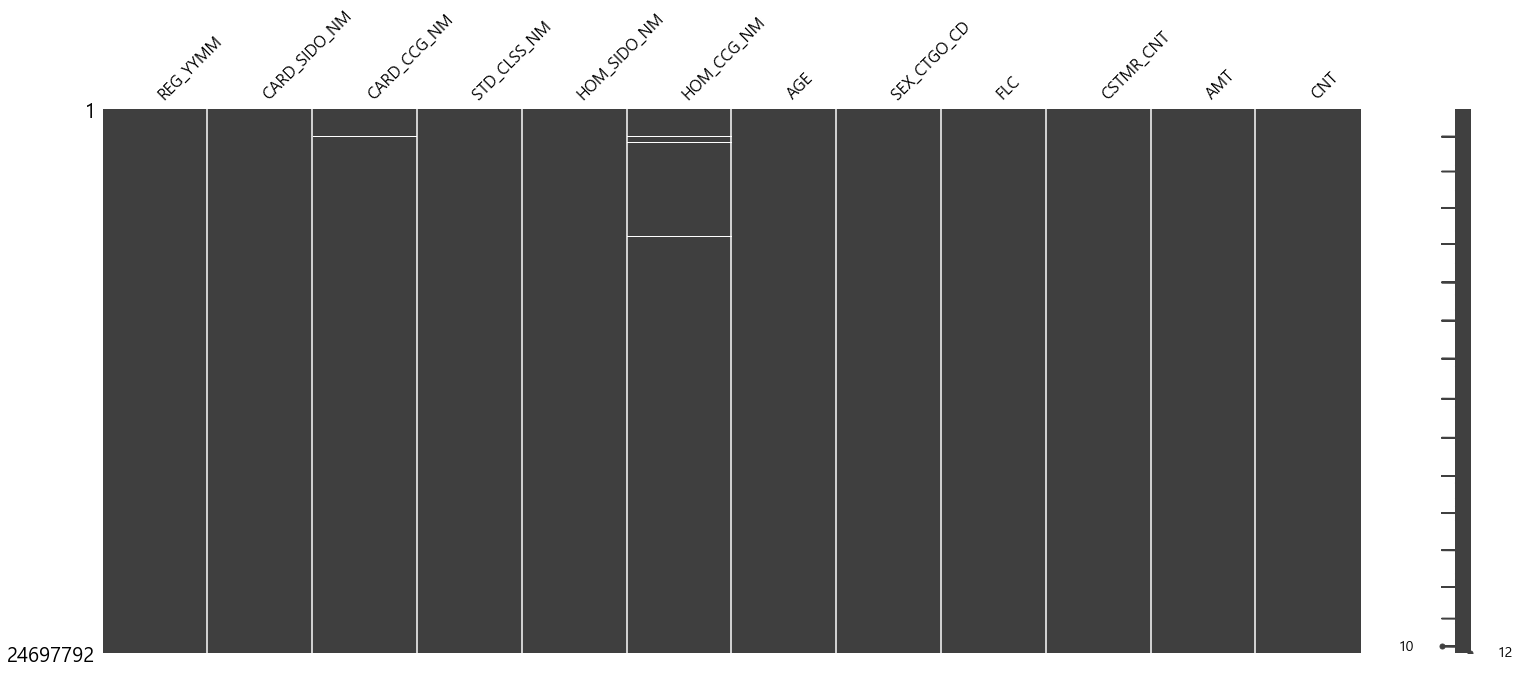

In [14]:
import missingno as msno

msno.matrix(data)

### Null 값 처리

- 각 주소지 시도 별로 가장 많이 발생하는 군 추출하여 null 값에 해당 값으로 대체하려고 했으나, 세종시에서 값이 없는 것을 확인
- null 값인 결제/ 거주지 시도는 세종밖에 없음 
- 따라서 결제/거주지 시도 세종인 결제/거주지 시군구를 세종으로 통일하여 값 넣어준다.

In [23]:
data.groupby('HOM_SIDO_NM')['HOM_CCG_NM'].agg(pd.Series.mode).to_frame()

,HOM_CCG_NM
HOM_SIDO_NM,
강원,원주시
경기,화성시
경남,김해시
경북,구미시
광주,북구
대구,달서구
대전,서구
부산,해운대구
서울,강남구


In [24]:
data.loc[data['HOM_CCG_NM'].isnull(),'HOM_SIDO_NM'].value_counts()

세종    147787
Name: HOM_SIDO_NM, dtype: int64

In [25]:
data.groupby('CARD_SIDO_NM')['CARD_CCG_NM'].agg(pd.Series.mode).to_frame()

,CARD_CCG_NM
CARD_SIDO_NM,
강원,강릉시
경기,성남시 분당구
경남,김해시
경북,경주시
광주,서구
대구,수성구
대전,유성구
부산,해운대구
서울,중구


In [26]:
data.loc[data['CARD_CCG_NM'].isnull(),'CARD_SIDO_NM'].value_counts()

세종    87213
Name: CARD_SIDO_NM, dtype: int64

In [27]:
data.loc[data['CARD_SIDO_NM']=='세종','CARD_CCG_NM'] ='세종'
data.loc[data['HOM_SIDO_NM']=='세종','HOM_CCG_NM'] ='세종'

### Column 간 상관관계 확인

In [17]:
# 상관관계 확인을 위해 
from sklearn.preprocessing import LabelEncoder

data_corr = data.copy()
data_corr.dropna(inplace=True)
s = (data_corr.dtypes == 'object')
object_cols = list(s[s].index)

label_encoder = LabelEncoder()
for col in object_cols:
    data_corr[col] = label_encoder.fit_transform(data_corr[col])

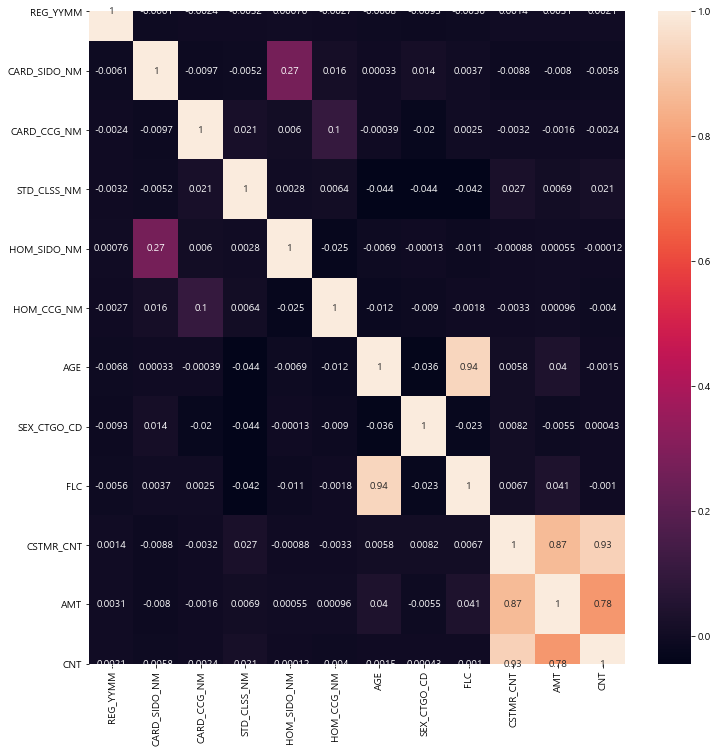

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(data_corr.corr(), annot=True)

AMT 와 관계 높은 것 : CSTMR_CNT,CNT,FLC, AGE
AMT 와 관계 낮은 것 : SEX_CTGO_CD, HOM_CCG_NM,HOM_SIDO_NM

HOM_SIDO_NM 과 CARD_SIDO_NM 연관성 높지만 꼭 일치하는 것은 아님

AGE 와 FLC 관계 높음 -> 연령대 별로 가구형태 패턴이 있는걸까?